# Lab 5: Data cleaning and analysis with Pandas
**Data Science for Biologists** &#8226; University of Washington &#8226; BIOL 419/519 &#8226; Winter 2019

Course design and lecture material by [Bingni Brunton](https://github.com/bwbrunton) and [Kameron Harris](https://github.com/kharris/). Lab design and materials by [Eleanor Lutz](https://github.com/eleanorlutz/), with helpful comments and suggestions from Bing and Kam.

### Table of Contents
1. Inspecting and cleaning data in Pandas
2. Working with figure objects in Matplotlib
3. Joining two Pandas dataframes
4. Bonus exercises

### Helpful resources
- [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas
- [10 minute Pandas tutorial](http://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html)
- [Pandas Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/9f0f2ae1-8bd8-4302-a67b-e17f3059d9e8) by Python for Data Science
- [Importing Data Cheat Sheet](https://datacamp-community-prod.s3.amazonaws.com/50d31142-3de0-4159-89b9-18b718a728ef) by Python for Data Science
- [Matplotlib introduction to Pyplot](https://matplotlib.org/tutorials/introductory/pyplot.html)
- [Matplotlib usage guide: includes helpful anatomy of a figure](https://matplotlib.org/tutorials/introductory/usage.html)
- [Detailed explanation of joining dataframes in Pandas](http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/04-merging-data.html)

### Data
- The data in this lab is originally from [Gapminder](https://www.gapminder.org/data/) and was edited for teaching purposes. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Lab 5 Part 1: Inspecting and cleaning data in Pandas
In Lab 4 we imported and worked with a very clean dataset. However, real data often has missing values or is saved in several different files. In this lab we'll review common issues when working with real data, such as removing missing values, reshaping and merging data matrices, and creating more complex figures. 

Today we will work with two spreadsheets in the `Lab_05` folder: `fertility_data.csv` and `child_mortality_data.csv`. These spreadsheets contain data from the years 1800 to 2000 on a small subset of countries. One dataset contains fertility over time (children per woman), and the other contains child mortality over time (deaths in children aged 0-5 years per 1000 births).

**Exercise 1:** Import the data using the code below. Edit the code to look at the first five rows of each dataset. 

In [2]:
fertility = pd.read_csv("./data/Lab_05/fertility_data.csv")
fertility.head()

,country,continent,1800,1805,1810,1815,1820,1825,1830,1835,...,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000
0,Afghanistan,Asia,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,7.67,7.67,7.67,7.67,7.67,7.67,7.68,7.69,7.83,7.73
1,Aruba,South America,5.64,5.64,5.64,5.64,NaN,NaN,5.64,5.64,...,5.44,4.82,3.84,2.91,2.51,2.39,2.33,2.25,2.06,1.87
2,Brazil,South America,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,...,6.14,6.21,5.82,5.02,4.50,4.07,3.45,2.81,2.50,2.36
3,China,Asia,5.50,5.50,5.50,5.50,5.50,5.50,5.50,5.50,...,5.98,3.99,6.02,5.75,3.58,2.32,2.65,2.43,1.68,1.45
4,Egypt,Africa,6.06,6.06,6.06,6.05,6.05,6.05,6.05,6.05,...,6.66,6.63,6.41,5.94,5.59,5.37,5.05,4.35,3.66,3.31


In [3]:
mortality = pd.read_csv("./data/Lab_05/child_mortality_data.csv")
mortality.head()

,country,continent,1800,1805,1810,1815,1820,1825,1830,1835,...,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000
0,Afghanistan,Asia,468.58,468.58,469.98,469.98,471.38,471.38,472.81,472.81,...,398.07,362.40,334.10,307.8,279.4,249.1,216.0,181.0,152.3,137.0
1,Brazil,South America,417.44,417.44,417.44,417.44,417.44,417.44,417.44,417.44,...,198.10,171.80,150.60,133.7,115.6,95.6,75.3,61.1,46.7,32.4
2,China,Asia,417.44,417.44,417.44,417.44,417.44,417.44,417.44,417.44,...,290.96,308.99,115.43,113.3,85.2,62.4,54.0,53.8,47.5,36.9
3,Egypt,Africa,404.69,404.69,NaN,404.69,404.69,404.69,404.69,404.69,...,360.50,NaN,NaN,NaN,NaN,NaN,118.8,85.9,64.6,46.5
4,France,Europe,412.34,384.88,333.01,282.37,284.84,305.66,282.91,277.27,...,40.20,28.50,22.30,18.2,15.0,12.4,10.3,9.0,6.5,5.4


### Removing discrepancies between datasets
In this lab we plan to directly compare global fertility trends to child mortality trends. Therefore, we are not interested in countries that only have data for one of the two variables. To remove these countries we first need to find out what they are. The `numpy` function `setdiff1d` returns all values in the first array that are not in the second array:

In [4]:
missing_in_mortality = np.setdiff1d(fertility['country'], mortality['country'])
print(missing_in_mortality)

['Aruba']


**Exercise 2:** Similarly, use `setdiff1d` to find the coutries in the mortality dataset that are missing from the fertility dataset. Place these missing countries in a variable called `missing_in_fertility`. 

In [5]:
missing_in_fertility = np.setdiff1d(mortality['country'], fertility['country'])
print(missing_in_fertility)

['San Marino']


Next, remove the problem countries from each dataset. In English, the code below means "create a new dataframe called `clean_F` that does not (`~`) contain any rows in which the `country` column value is in the `missing_in_mortality` array. 

In [6]:
clean_F = fertility[~fertility['country'].isin(missing_in_mortality)]

**Exercise 3:** Create a new dataframe called `clean_M` that similarly removes problematic countries from the original mortality dataset. 

In [7]:
clean_M = mortality[~mortality['country'].isin(missing_in_fertility)]

At this point both cleaned datasets should have the same shape:

In [8]:
print("shape of fertility data:", clean_F.shape)
print("shape of mortality data:", clean_M.shape)

shape of fertility data: (25, 43)
shape of mortality data: (25, 43)


## Lab 5 Part 2: Working with figure objects in Matplotlib

Now that we are working with data that has many different variables, it's useful to know some more complex plotting commands to look at this data. 

In particular, we can declare `Matplotlib` figures as variables. Giving these objects variable names allows us to edit the objects after they are made - for example, by adding multiple subplots or graphs to the same figure, or adding a colorbar key for all colors used to create a heatmap. 

### Making a heatmap in Matplotlib
Since both of our datasets are three dimensional (years, countries, and fertility / mortality data), a heatmap might help visualize this data in a way that's easier to understand. 

To create a heatmap in `Matplotlib`, we need three variables: 
- The values for the x variables (in our case, years)
- The values for the y variables (in our case, country)
- A matrix or Pandas dataframe containing only the numbers to visualize (in our case, fertility or mortality)

In [9]:
# Get the values for all of the y variables by 
# creating a variable "countries" holding all values from 
# the "country" column in the clean_F dataframe

countries = clean_F['country'].values
print(countries)

['Afghanistan' 'Brazil' 'China' 'Egypt' 'France' 'Germany' 'India' 'Iran'
 'Israel' 'Italy' 'Japan' 'Mexico' 'Netherlands' 'Nigeria' 'Pakistan'
 'Qatar' 'Russia' 'Saudi Arabia' 'Singapore' 'Spain' 'Sweden' 'Switzerland'
 'Turkey' 'United States' 'Venezuela']


To get all of the year values in a list, we can use the `Pandas` `df.columns.values` function to get a list of column headers. However, since the `clean_F` dataframe also contains "continent" and "country" columns, we need to remove these using the `drop()` function. 

In [10]:
# axis=1 specifies that we are dropping columns, not rows
temp = clean_F.drop(['continent', 'country'], axis=1)
years = temp.columns.values

print(years)
temp.head()

['1800' '1805' '1810' '1815' '1820' '1825' '1830' '1835' '1840' '1845'
 '1850' '1855' '1860' '1865' '1870' '1875' '1880' '1885' '1890' '1895'
 '1900' '1905' '1910' '1915' '1920' '1925' '1930' '1935' '1940' '1945'
 '1950' '1955' '1960' '1965' '1970' '1975' '1980' '1985' '1990' '1995'
 '2000']


,1800,1805,1810,1815,1820,1825,1830,1835,1840,1845,...,1955,1960,1965,1970,1975,1980,1985,1990,1995,2000
0,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,NaN,...,7.67,7.67,7.67,7.67,7.67,7.67,7.68,7.69,7.83,7.73
2,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,6.26,...,6.14,6.21,5.82,5.02,4.50,4.07,3.45,2.81,2.50,2.36
3,5.50,5.50,5.50,5.50,5.50,5.50,5.50,5.50,5.50,5.50,...,5.98,3.99,6.02,5.75,3.58,2.32,2.65,2.43,1.68,1.45
4,6.06,6.06,6.06,6.05,6.05,6.05,6.05,6.05,6.05,6.04,...,6.66,6.63,6.41,5.94,5.59,5.37,5.05,4.35,3.66,3.31
5,4.41,4.16,3.90,3.87,3.84,3.78,3.72,3.64,3.56,3.52,...,2.68,2.77,2.77,2.49,2.06,1.83,1.84,1.75,1.72,1.82


Using these three variables we can now plot the heatmap in `Matplotlib`. Notice that the missing values in the dataset show up as white blocks in the heatmap - `Matplotlib` does this automatically to missing data in heatmaps. 

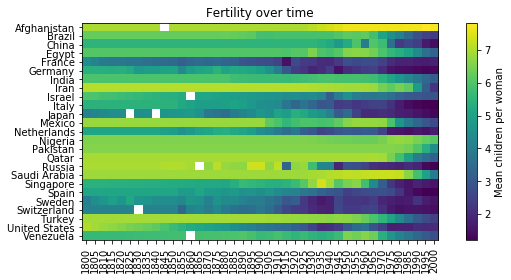

In [11]:
# Create a figure called fig
# with the sizes 10 inches wide by 4 inches high.
fig = plt.figure(figsize=(10, 4))

# Add a subplot within the figure
ax1 = fig.add_subplot(1,1,1)

# Create the heatmap as the variable img
img = ax1.imshow(temp.values)

# Plot the labels for the y axis (countries)
ax1.set_yticks(np.arange(len(countries)))
ax1.set_yticklabels(countries)

# Plot the labels for the x axis (years)
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years, rotation=90)

# Add a colorbar for the variable img
cbar = fig.colorbar(img, ax=ax1)

cbar.set_label('Mean children per woman')
ax1.set_title("Fertility over time")
plt.show()

**Exercise 4:** Similarly, make a heatmap showing the mortality data over time.

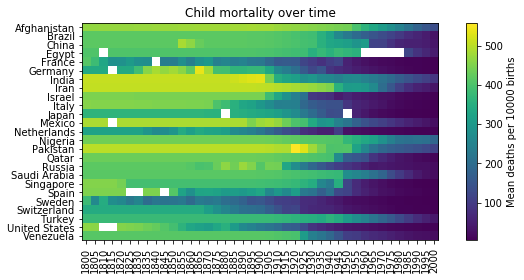

In [12]:
countries = clean_M['country'].values
temp = clean_M.drop(['continent', 'country'], axis=1) # axis=1 specifies that we are dropping columns, not rows
years = temp.columns.values

fig = plt.figure(figsize=(10, 4))
ax1 = fig.add_subplot(1,1,1)
img = ax1.imshow(temp.values)
ax1.set_yticks(np.arange(len(countries)))
ax1.set_yticklabels(countries)
ax1.set_xticks(np.arange(len(years)))
ax1.set_xticklabels(years, rotation=90)
cbar = fig.colorbar(img, ax=ax1)

cbar.set_label('Mean deaths per 10000 births')
ax1.set_title("Child mortality over time")
plt.show()

## Lab 5 Part 3: Joining two Pandas dataframes

After visualizing both the fertility and mortality dataset, it looks like both datasets seem to be following similar trends. We would like to see if this relationship can be described using a linear regression model. 

Right now the data is in two different datasets, so before we can place these data points in a matrix we need a way to pair each mortality value to the corresponding fertility value (by year and country). 

### Melting Pandas dataframes
The first step is to reduce the dataframe to a format that facilitates merging. Right now the fertility values are arranged throughout the fertility dataframe under many different columns. It would be more helpful if the year values were contained in their own column, so that all of the fertility data could be contained a single column instead of many:

In [13]:
# Using a temporary dataframe like before, 
# create a list that contains all of the year values
# that should be stored in the new "year" column
temp = clean_F.drop(['continent', 'country'], axis=1)
years = temp.columns.values

# The pandas melt function pivots dataframes into different arrangements.
# Here is what each argument means:
# id_vars: columns that should remain the same after melting
# value_vars: the column heades that should be unwrapped to the row axis
# var_name: the column header for the new column created by unwrapping value_vars (years)
# value_name: the column header for the new column created by unwrapping the values
melt_F = clean_F.melt(id_vars=['continent','country'], value_name='fertility', 
                 value_vars=years, var_name="year")
melt_F.head()

,continent,country,year,fertility
0,Asia,Afghanistan,1800,7.00
1,South America,Brazil,1800,6.26
2,Asia,China,1800,5.50
3,Africa,Egypt,1800,6.06
4,Europe,France,1800,4.41


**Exercise 5:** Similarly, melt the `clean_M` cleaned mortality dataframe. *Hint:* Remember to change the `value_name` argument to something that best describes the data in this particular dataframe!

In [14]:
temp = clean_M.drop(['continent', 'country'], axis=1)
years = temp.columns.values
melt_M = clean_M.melt(id_vars=['continent','country'], value_name='mortality', 
                 value_vars=years, var_name="year")
melt_M.head()

,continent,country,year,mortality
0,Asia,Afghanistan,1800,468.58
1,South America,Brazil,1800,417.44
2,Asia,China,1800,417.44
3,Africa,Egypt,1800,404.69
4,Europe,France,1800,412.34


### Merging Pandas dataframes
Now that both dataframes are in a simplified, identical format, they can be merged together. The `Pandas` `merge` function can join two or more dataframes together in many different ways. We will use only the default way in this lab (an inner join) but you can read about other options [here](http://chris.friedline.net/2015-12-15-rutgers/lessons/python2/04-merging-data.html) if you're interested. The `on` argument in `merge()` specifies that rows from the two dataframes will only be included if they share the same values for `country` *and* `continent` *and* `year` in both columns. Rows with these "join keys" present in only one dataframe will not be included. 

In [15]:
merge = pd.merge(melt_F, melt_M, on=['country', 'continent', 'year'])
merge.head()

,continent,country,year,fertility,mortality
0,Asia,Afghanistan,1800,7.00,468.58
1,South America,Brazil,1800,6.26,417.44
2,Asia,China,1800,5.50,417.44
3,Africa,Egypt,1800,6.06,404.69
4,Europe,France,1800,4.41,412.34


Now that we've combined the two dataframes, we can manipulate pairs of data points individually. For example, now we can remove all data pairs where one (or more) of the data points are missing. First we'll print out the total number of missing (or NaN) values in this merged dataframe.

In [16]:
merge.isnull().sum().sum()

23

The Pandas `dropna()` function can remove missing data from our dataframe. The [userguide](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) for `dropna()` informs us that the parameter `axis=0` will "Drop rows which contain any missing values" (as opposed to columns):

In [17]:
merge = merge.dropna(axis=0)

Now when we count the number of missing values in this dataset again, we can see that there are (hopefully) no NaN values left. This is important because many statistical tests, such as the matrix linear regression we learned (`np.linalg.lstsq()`), will not work if there are missing data points.

In [18]:
merge.isnull().sum().sum()

0

**Exercise 6:** Using the dataframe with no missing values, compute ${p1}$ and ${p2}$ for the regression equation ${mortality = p1*fertility + p2}$.

In [19]:
ones = np.ones(len(merge['mortality']))
A = np.vstack([merge['fertility'], ones]).T
b = np.vstack(merge['mortality'])
p1, p2 = np.linalg.lstsq(A, b)[0]
print(p1, p2)

[ 74.37144479] [-84.62657672]


**Exercise 7:** Make a scatterplot of data from all countries and all years. Add the linear regression line you just computed to this plot. 

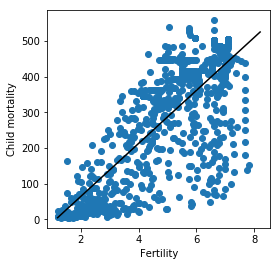

In [20]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)

ax.scatter(merge["fertility"], merge["mortality"])
xhat = np.arange(min(merge['fertility']), max(merge['fertility']+1))
yhat = p1*xhat + p2
ax.plot(xhat, yhat, color="k")
    
ax.set_xlabel("Fertility")
ax.set_ylabel("Child mortality")
plt.show()

## Lab 5 Bonus exercises

**Bonus Exercise 1:** On the code for the previous graph, color the scatterpoints from each continent a different color. Add a legend to the plot. 

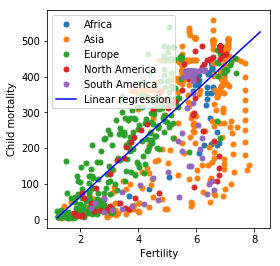

In [21]:
fig = plt.figure(figsize=(4, 4))
ax = fig.add_subplot(1,1,1)

groups = merge.groupby('continent')
for name, group in groups:
    ax.plot(group["fertility"], group["mortality"], 
            marker='o', linestyle='', ms=5, label=name)

xhat = np.arange(min(merge['fertility']), max(merge['fertility']+1))
yhat = p1*xhat + p2
ax.plot(xhat, yhat, color="blue", label="Linear regression")
    
ax.set_xlabel("Fertility")
ax.set_ylabel("Child mortality")
ax.legend()
plt.show()

So far this lab has only included `Matplotlib` figures with one subplot. However, the same syntax used today can be used to create many subplots and plot several different datasets on the same figure. The block below provides the bare bones code to plot the fertility vs mortality data for each individual country. 

**Bonus Exercise 2:** Add the country name as the title of each subplot.

**Bonus Exercise 3:** Set the axis limits of all subplots to be the same, for easier comparison between countries. Make sure that the limits are appropriate and do not omit any data points. 

**Bonus Exercise 4:** Add a y axis label for just the leftmost five subplots. Add a x axis label for just the bottom five subplots. 

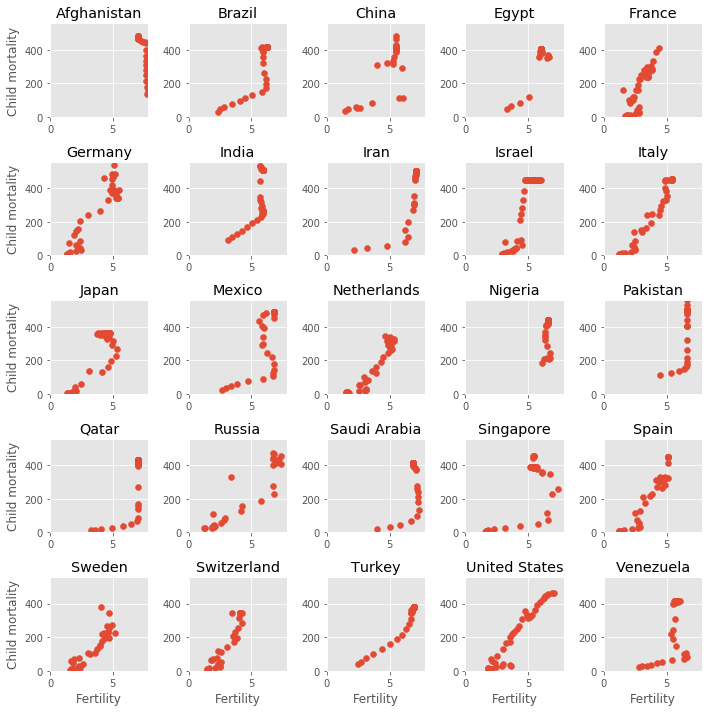

In [24]:
fig = plt.figure(figsize=(10,10))
countries = merge["country"].unique()

for n in range(len(countries)):
    country = countries[n]
    ax = fig.add_subplot(5, 5, n+1)
    temp = merge[merge["country"] == country]
    ax.scatter(temp['fertility'], temp['mortality'])
    
    ax.set_title(country)
    ax.set_ylim(0, max(merge["mortality"]))
    ax.set_xlim(0, max(merge["fertility"]))
    
    if n % 5 == 0:
        ax.set_ylabel("Child mortality")
    if n >= 20:
        ax.set_xlabel("Fertility")
    
plt.tight_layout()
plt.show()

**Bonus exercise 4:** By default, `Matplotlib` plots figures in its "default" style. However, there are many others that use different different color schemes, label locations, etc. The code below sets the `Matplotlib` style to the popular "ggplot" style. Like `%matplotlib inline`, this command will apply to any code cell run subsequently. 

After running the cell, try re-running the figure code from Bonus Exercises 2~4. Look through the [stylesheet gallery](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) and try a couple other styles for the figure you created in Bonus Exercises 2~4. 

A particularly helpful plot style is `seaborn-colorblind`, which changes the default colors to be distinguishable to colorblind people. 

In [23]:
plt.style.use("ggplot")